In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Function to calculate gini impurity
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probability = counts / counts.sum()
    return 1 - np.sum(probability ** 2)

In [4]:
def best_split(x, y, feature_index):
    unique_values = np.unique(x[:, feature_index])
    best_gini, best_value, best_left, best_right = float('inf'), None, None, None

    for val in unique_values:
        left_mask = x[:, feature_index] <= val
        right_mask = ~left_mask

        left_gini = gini_impurity(y[left_mask])
        right_gini = gini_impurity(y[right_mask])

        weighted_gini = (left_gini * left_mask.sum() + right_gini * right_mask.sum()) / len(y)

        if weighted_gini < best_gini:
            best_gini, best_value = weighted_gini, val
            best_left, best_right = left_mask, right_mask

        return (best_value, best_left, best_right, best_gini)

In [5]:
def best_feature(x, y):
    best_gini, best_features, best_value, best_left, best_right = float('inf'), None, None, None, None

    for i in range(x.shape[1]):
        value, left, right, gini = best_split(x, y, i)

        if gini < best_gini:
            best_gini, best_value, best_features = gini, value, i
            best_left, best_right = left, right

    return (best_features, best_value, best_left, best_right)

In [6]:
def build_tree(x, y, depth = 0, max_depth = 3):
    if depth >= max_depth or len(np.unique(y)) == 1:
        return np.bincount(y).argmax()
    
    feature, value, left_mask, right_mask = best_feature(x, y)

    if feature is None:
        return np.bincount(y).argmax()
    
    left_subtree = build_tree(x[left_mask], y[left_mask], depth + 1, max_depth)
    right_subtree = build_tree(x[right_mask], y[right_mask], depth + 1, max_depth)

    return (feature, value, left_subtree, right_subtree)

In [7]:
def predict(tree, x):
    if isinstance(tree, (int, np.integer)):
        return tree
    
    feature, value, left_subtree, right_subtree = tree
    if x[feature] <= value:
        predict(left_subtree, x)
    else:
        predict(right_subtree, x)

In [8]:
data_values = data.values
np.random.shuffle(data_values)

x_data = data_values[:, :-1]
y_data = data_values[:, -1].astype(int)

shape = x_data.shape
print(f"Shape of the features: {shape}")

Shape of the features: (1372, 4)


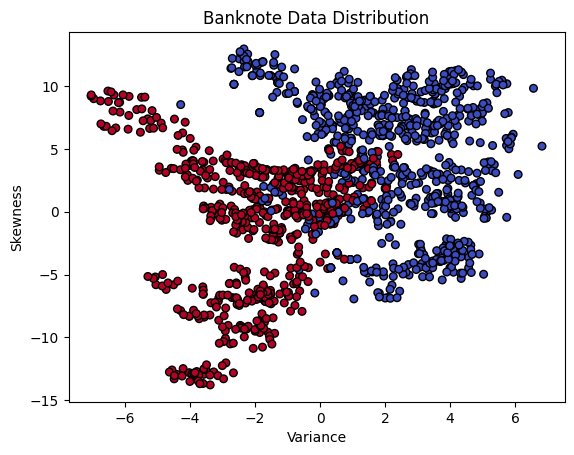

In [9]:
def plot_data(x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=30)
    plt.xlabel("Variance")
    plt.ylabel("Skewness")
    plt.title("Banknote Data Distribution")
    plt.show()

plot_data(x_data, y_data)

In [10]:
split_index = int(0.8 * len(y_data))
y_train, y_test = y_data[:split_index], y_data[split_index:]
x_train, x_test = x_data[:split_index], x_data[split_index:]

In [11]:
tree = build_tree(x_train, y_train)

y_pred = [predict(tree, x) for x in x_test]

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 0.00%
